In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [51]:
a_df= pd.read_csv('Admission_Predict.csv')
a_df.head()

,Serial-No.,GRE-Score,TOEFL-Score,University-Rating,SOP,LOR,CGPA,Research,Chance-of-Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [52]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial-No.         500 non-null    int64  
 1   GRE-Score          500 non-null    int64  
 2   TOEFL-Score        500 non-null    int64  
 3   University-Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance-of-Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


<Figure size 1080x720 with 0 Axes>

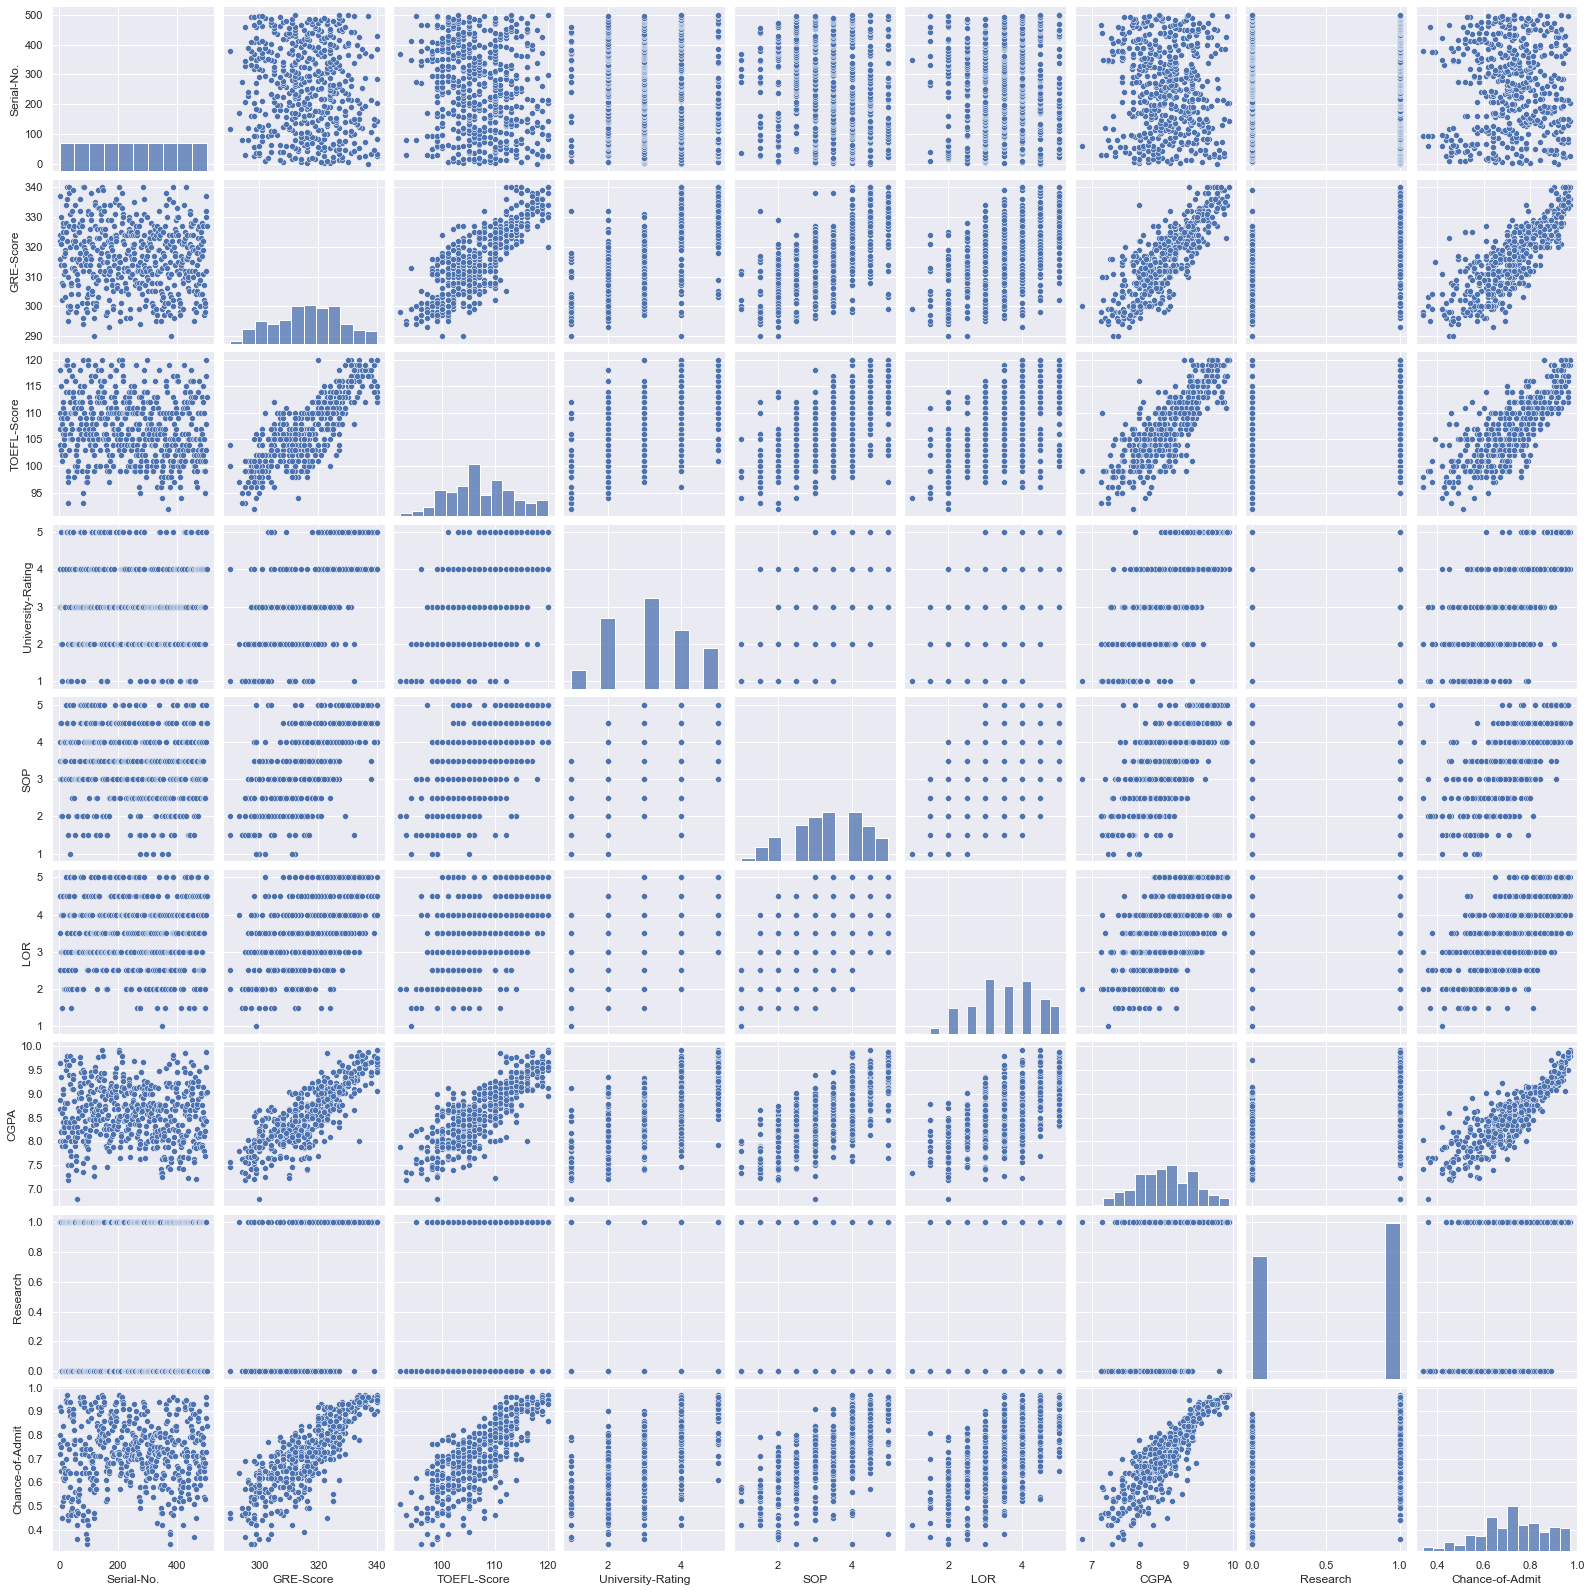

In [53]:
plt.figure(figsize=(15,10))
sns.pairplot(a_df)

<AxesSubplot:>

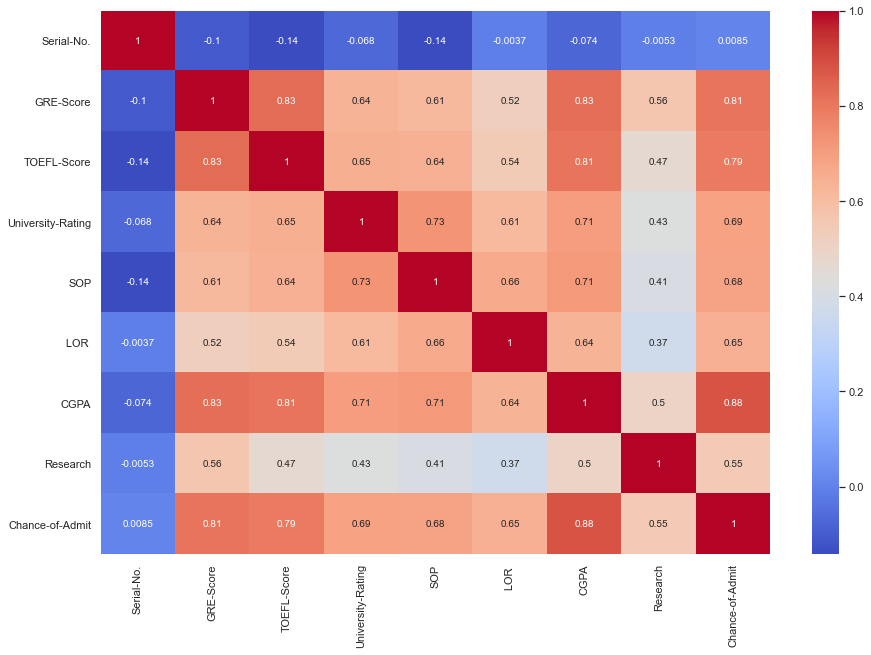

In [54]:
plt.figure(figsize=(15,10))

sns.heatmap(a_df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='Serial-No.', ylabel='University-Rating'>

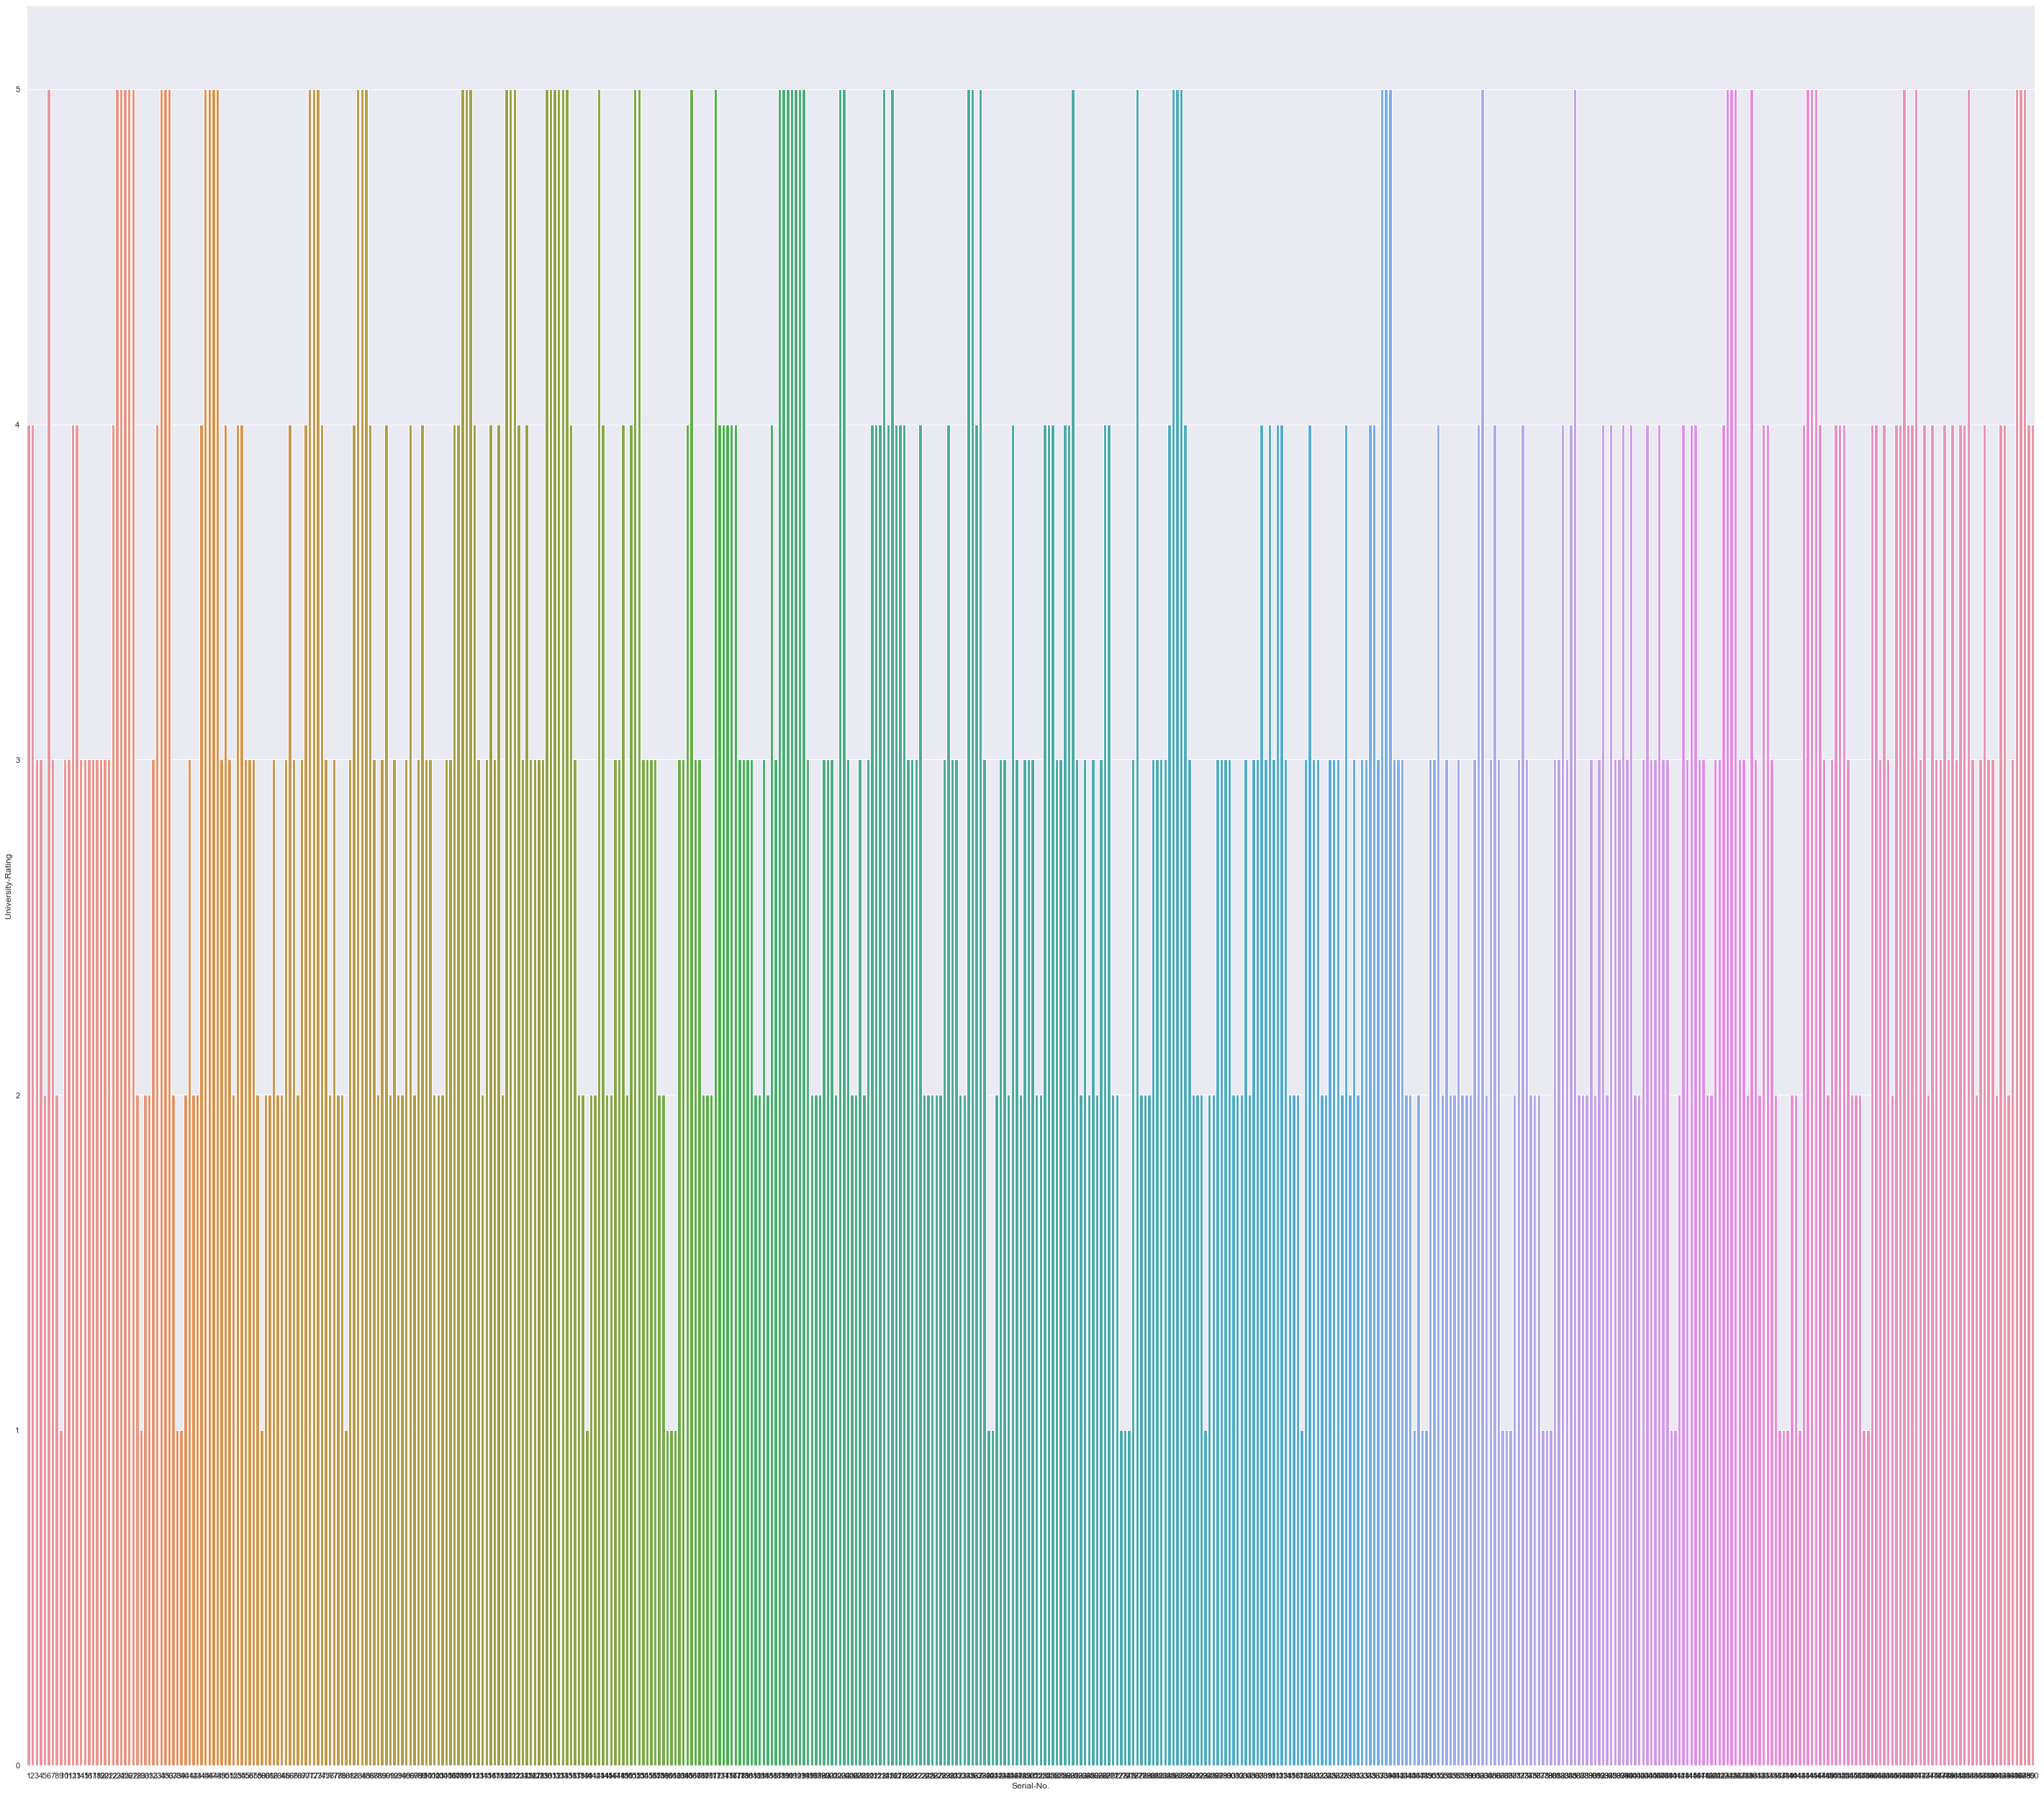

In [55]:
plt.figure(figsize=(50,45))

sns.barplot(x='Serial-No.',y='University-Rating',data=a_df)

In [56]:
a_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial-No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE-Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL-Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University-Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance-of-Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [57]:
a_df.Research.value_counts()

1    280
0    220
Name: Research, dtype: int64

In [86]:
X = a_df.iloc[:, :-1].values
y = a_df.iloc[:, 1].values

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [89]:
y_pred = regressor.predict(X_test)
y_pred

array([318., 321., 321., 328., 301., 314., 298., 302., 297., 324., 317.,
       320., 314., 313., 334., 297., 323., 317., 326., 300., 295., 320.,
       296., 331., 322., 318., 325., 311., 306., 304., 316., 296., 301.,
       323., 315., 298., 328., 324., 300., 310., 314., 329., 330., 316.,
       327., 324., 333., 326., 309., 314., 306., 312., 305., 325., 309.,
       328., 295., 323., 305., 308., 296., 329., 307., 323., 319., 306.,
       325., 326., 299., 329., 331., 325., 312., 317., 320., 338., 325.,
       322., 297., 317., 309., 326., 300., 312., 327., 299., 321., 309.,
       302., 322., 313., 324., 311., 317., 307., 336., 316., 305., 309.,
       305., 338., 319., 336., 308., 321., 314., 320., 325., 305., 312.,
       294., 308., 316., 302., 304., 324., 304., 340., 325., 331., 311.,
       327., 333., 330., 317., 299., 311., 322., 318., 313., 311., 324.,
       320., 320., 312., 307., 312., 295., 319., 317., 316., 334., 314.,
       322., 322., 314., 324., 311., 328., 330., 33

In [91]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 2.660397974972897e-26
MAE: 1.3989607875324607e-13
RMSE: 1.6310726455228464e-13
r2_score: 1.0
